In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])


In [4]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 12)

In [6]:
df.describe()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier'] = iso_forest.fit_predict(df)

In [8]:
inliers_IF = df[df['is_inlier'] == 1]
outliers_IF = df[df['is_inlier'] == -1]

In [9]:
outliers_IF

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,is_inlier
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,-1
7,15656148,376,1,0,29,4,115046.74,4,1,0,119346.88,1,-1
30,15589475,591,2,0,39,3,0.00,3,1,0,140469.38,1,-1
41,15738148,465,0,0,51,8,122522.32,1,0,0,181297.65,1,-1
43,15755196,834,0,0,49,2,131394.56,1,0,0,194365.76,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,15796764,684,1,0,56,3,127585.98,3,1,1,80593.49,1,-1
9920,15673020,678,0,0,49,3,204510.94,1,0,1,738.88,1,-1
9936,15653037,609,0,1,77,1,0.00,1,0,1,18708.76,0,-1
9962,15594612,702,2,1,44,9,0.00,1,0,0,59207.41,1,-1


In [10]:
inliers_IF

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,is_inlier
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,1
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1
5,15574012,645,2,1,44,8,113755.78,2,1,0,149756.71,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,800,0,0,29,2,0.00,2,0,0,167773.55,0,1
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0,1
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1


In [11]:
def is_inlier(row):
    # Age constraint: age >= 18
    if row['age'] < 18:
        #print(f"Invalid age: {row['age']}")
        return -1
    
    # Balance constraint: balance >= 0
    if row['balance'] < 0:
        return -1
    
    # Estimated Salary constraint: estimated_salary >= 0
    if row['estimated_salary'] < 0:
        return -1
    
    # Credit Score constraint: 300 <= credit_score <= 850
    if row['credit_score'] < 300 or row['credit_score'] > 850:
        return -1
    
    # If all constraints are satisfied, return True
    return 1

In [12]:
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [13]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,is_inlier,is_inlier_HW


In [14]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier'] + df['is_inlier_HW']) / 2

In [15]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [16]:
mismatch.to_csv("disagreement.csv")

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier'])
conf_matrix

array([[   0,    0],
       [1000, 9000]])

Text(95.72222222222221, 0.5, 'Handwritten')

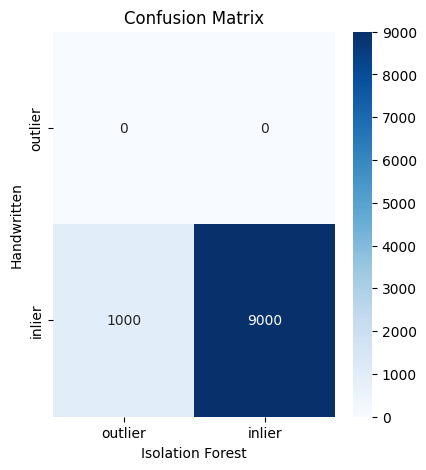

In [18]:
# Plot confusion matrix for Decision Tree
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [19]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [20]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")